<a href="https://colab.research.google.com/github/miles-garcia/DSPS_MGarcia/blob/main/P661_HW1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total),
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [ ]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize

%pylab inline
import seaborn
seaborn.set_style("darkgrid")

import scipy as sp
from scipy import stats

'''
I worked with Sarah and Masooma on the distribution generation parts (ie., not the fitting)


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use

In [ ]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq','pois','gaus','binomial','cauchy']


## and which *population* mean to give it (it will be the same for each distribution)

In [ ]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this!

![1](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

In class aI used scipy.stats. You are free to use what you want!



In [ ]:
# the chi sq distribution takes the number of degrees of freedom,
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! But youn can do this however you want

Lets start by looking at a single chi sq distribution of 100 elements

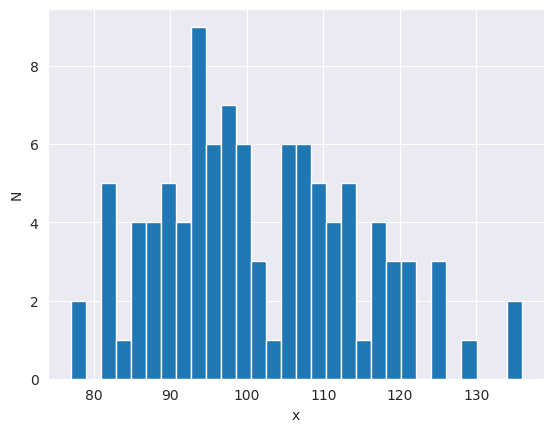

In [ ]:
# Note: I am adding imports here, to show the workflow:
# at this point I realize what packages I need and I import them.
# but this is a PEP8 violation.
# It is a good habit to put the includes at the top
# so the code fails right away if the packages are missing.
# Otherwise a user may have a piece of code running for a long time,
# and then fail when the package cannot be imported...
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(421) #WHY DO I DO THIS??
# prepare a container for all the distribution:
# a dictionary so you can call each family of distribution by "key"
mydists = {}
# mydists is an empty disctionary;
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it:
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom.

## let numpy calculate what the mean and stdev of this distribution are

In [ ]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 101.85, standard deviation: 13.00


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes. But you do not lave to do it like this. You do you, just make it work.

In [ ]:
#mysize = (np.random.rand(100) * 1000).astype(int)
#mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = (1000 / (np.array(np.arange(1, 101) + [10]))).astype(int)
mysize = (np.logspace(1, 3.3, 100, base=10)).astype(int)
#mysize....
print ("shape of the 'size' list that contains the size of each distribution",
       mysize.shape)

shape of the 'size' list that contains the size of each distribution (100,)


Text(0, 0.5, 'frequency')

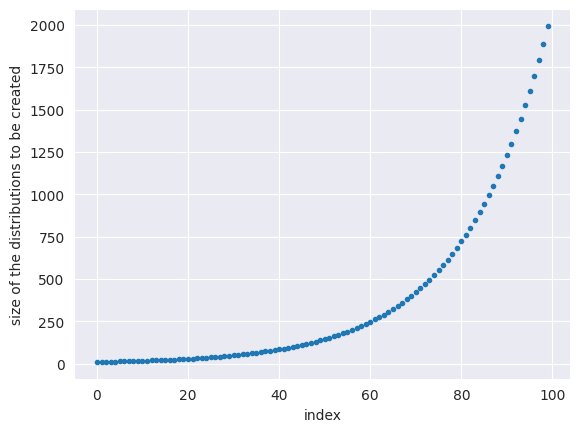

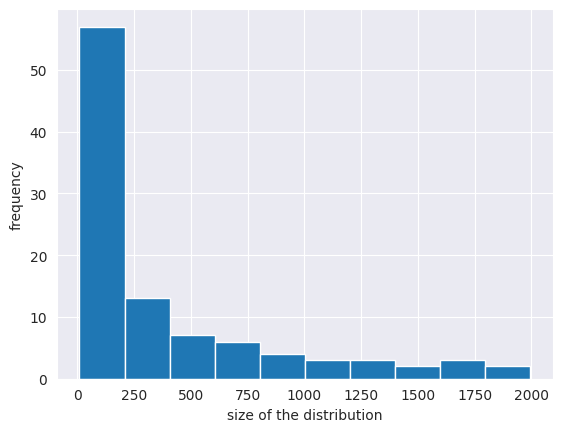

In [ ]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")


Figure 2: scatter plot and distribution of sample sizes for 100 samples to be created (note, the current choice does not produce more small then large distribution, which is desirable)

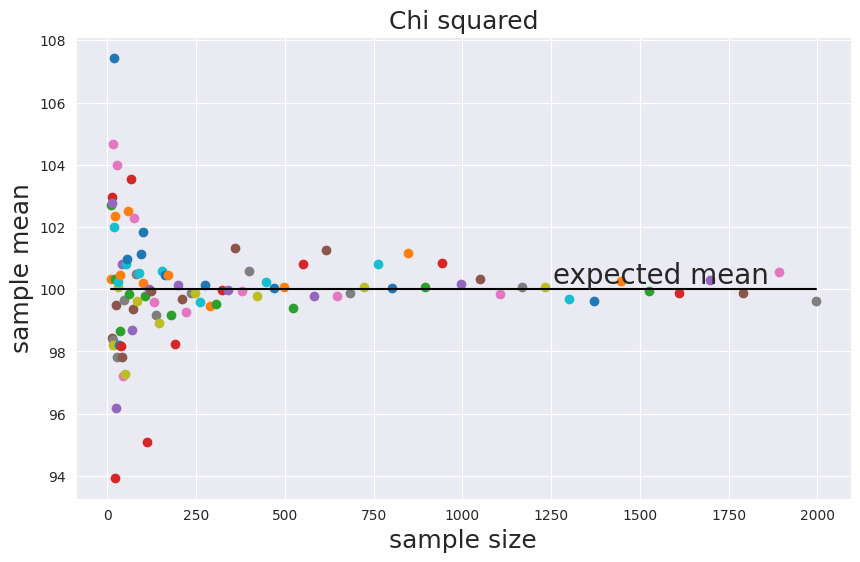

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable
np.random.seed(421)
for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100

# save the means for plotting later

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 2: Sample mean vs. Sample size: We can clearly see that chi^2 distributions with a larger sample size have sample means that are much closer to the expected mean than chi^2's with smaller sample sizes.

# now the histogram of the mean of all samples:
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

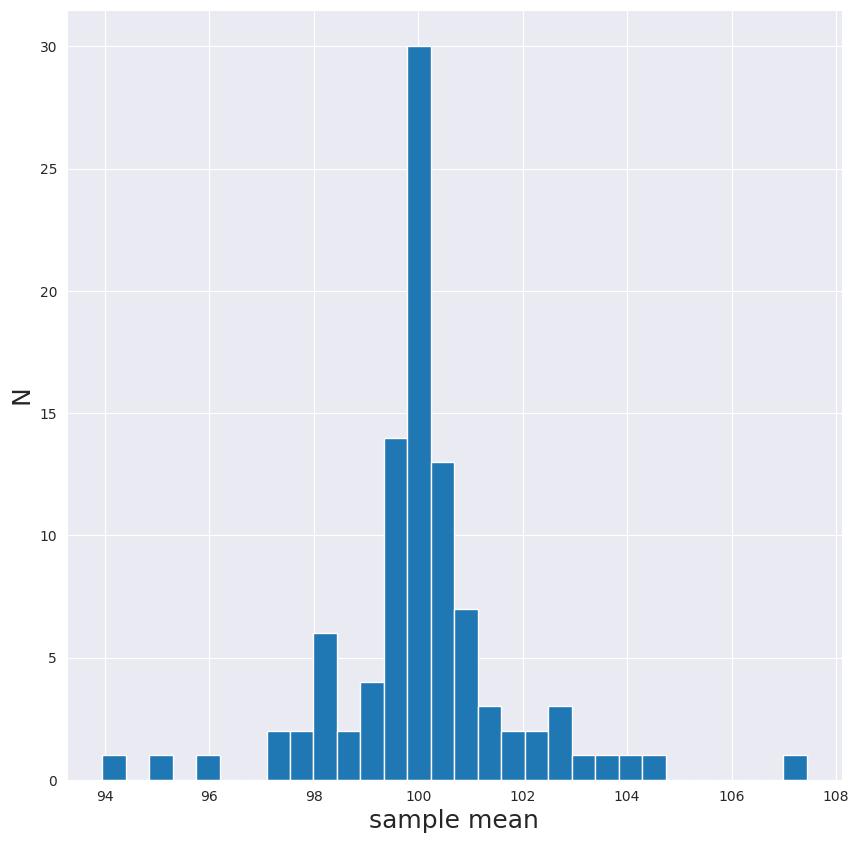

In [ ]:
allmeans = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

## Figure 3: Histogram of the 100 chi^2 distribution means with sample sizes ranging from 10 to 2000. We can see that the means form a gaussian-looking distribution, peaking (ie., with mean) at the theoretical mean 100.

# Do it for the Normal distribution


In [ ]:
##your code here...

In [ ]:
np.mean(np.random.normal(mymean,1,10))

99.91449561345206

In [ ]:
np.random.seed(421)
Normals = []
Normal_Means = []
for i in range(100):
  temp = np.random.normal(mymean,1,mysize[i]) #100 normal distributions, each with different lengths according to mysize length array from before. Is this an efficient way to do this? Probably not. But dictionaries are lame.
  Normals.append(temp)
  Normal_Means.append(np.mean(temp))

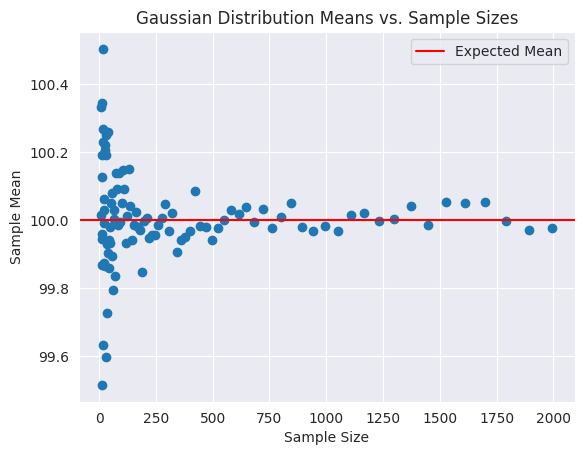

In [ ]:
plt.scatter(mysize,Normal_Means)
plt.title("Gaussian Distribution Means vs. Sample Sizes")
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.axhline(100,0,2000,color="red",label = "Expected Mean")
plt.legend()
plt.show()

##Figure 4: Sample Means vs. Sample Sizes for 100 Gaussian distributions with different sample sizes (but same true means and standard deviations).

Gaussians with larger sample sizes have means that are generally closer to the expected mean.

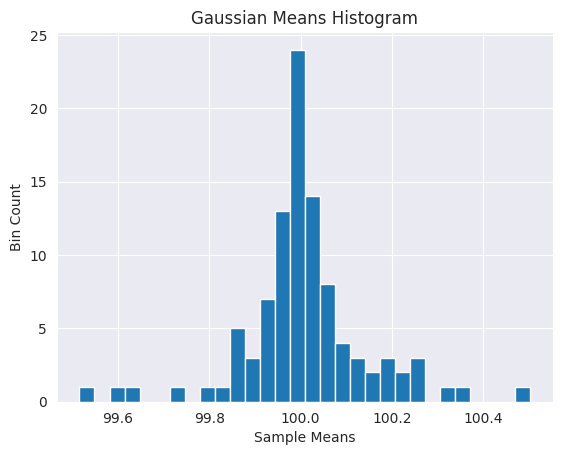

In [ ]:
plt.hist(Normal_Means,bins=30)
plt.title("Gaussian Means Histogram")
plt.xlabel("Sample Means")
plt.ylabel("Bin Count")
plt.show()

##Figure 5: Gaussian sample means histogram. Looks gaussian-ish, witha mean close to the expected mean of 100.

# Do it for the Poisson distribution

In [ ]:
##your code here...

In [ ]:
Pois = []
Pois_Means = []
for i in range(100):
  temp = np.random.poisson(mymean,mysize[i]) #the mean of poisson is equal to lambda, the first parameter in np.random.poisson
  Pois.append(temp)
  Pois_Means.append(np.mean(temp))

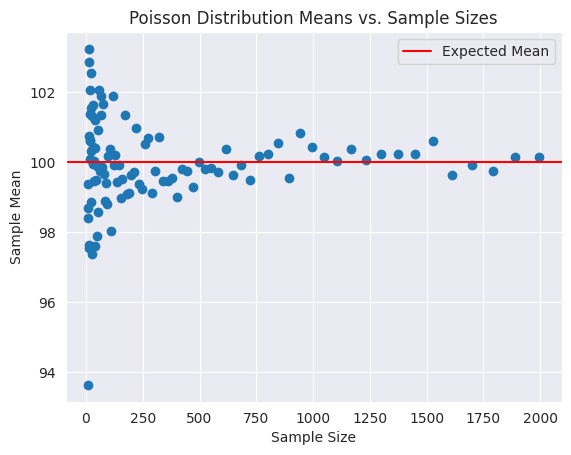

In [ ]:
plt.scatter(mysize,Pois_Means)
plt.title("Poisson Distribution Means vs. Sample Sizes")
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.axhline(100,0,2000,color="red",label = "Expected Mean")
plt.legend()
plt.show()

##Figure 6: Poisson Distribution sample means vs. sample size.

Law of large numberes applies; larger sample size poissonians have means that generally are closer to the expected mean.

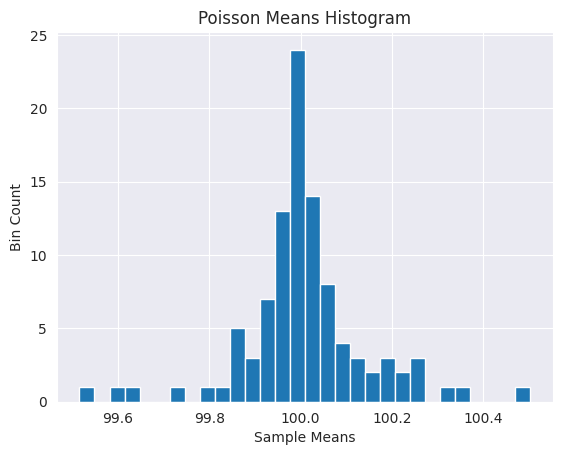

In [ ]:
plt.hist(Normal_Means,bins=30)
plt.title("Poisson Means Histogram")
plt.xlabel("Sample Means")
plt.ylabel("Bin Count")
plt.show()

##Fig 7: Poisson Sample Means histogram. We can see that this histogram looks gaussian again, and the mean would be close to the expected mean of 100.

# Do it for the Binomial distribution

In [ ]:
Binomial = []
Bin_Means = []
for i in range(100):
  temp = np.random.binomial(200,0.5,mysize[i]) #the mean of binomial is equal to n*p, so n=200 and p=0.5 should give mean of 100
  Binomial.append(temp)
  Bin_Means.append(np.mean(temp))

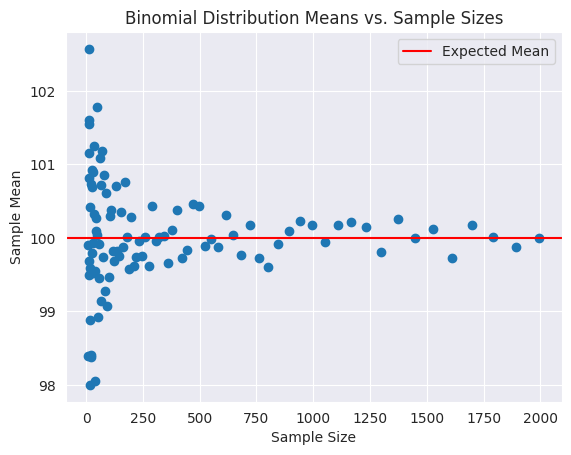

In [ ]:
plt.scatter(mysize,Bin_Means)
plt.title("Binomial Distribution Means vs. Sample Sizes")
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.axhline(100,0,2000,color="red",label = "Expected Mean")
plt.legend()
plt.show()

##Figure 8: Binomial Distribution sample means vs. sample size.

Law of large numberes applies; larger sample size binomials have means that generally are closer to the expected mean of 100.

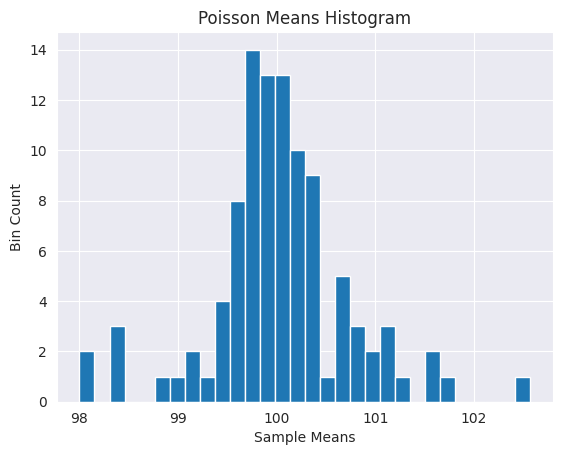

In [ ]:
plt.hist(Bin_Means,bins=30)
plt.title("Poisson Means Histogram")
plt.xlabel("Sample Means")
plt.ylabel("Bin Count")
plt.show()

##Fig 9: Binomial Sample Means histogram. We can see that this histogram looks somewhat gaussian, and the mean would be close to the expected mean of 100. If we had more than 100 samples this probably would look more gaussian.

# Do it for another distribution (Cauchy Distribution)

In [ ]:
##your code here...


In [ ]:

Cauchy = []
Cauchy_Means = []
for i in range(100):
  temp = stats.cauchy.rvs(loc=100, scale=1, size=mysize[i])  #the mean of binomial is equal to n*p, so n=200 and p=0.5 should give mean of 100
  Cauchy.append(temp)
  Cauchy_Means.append(np.mean(temp))

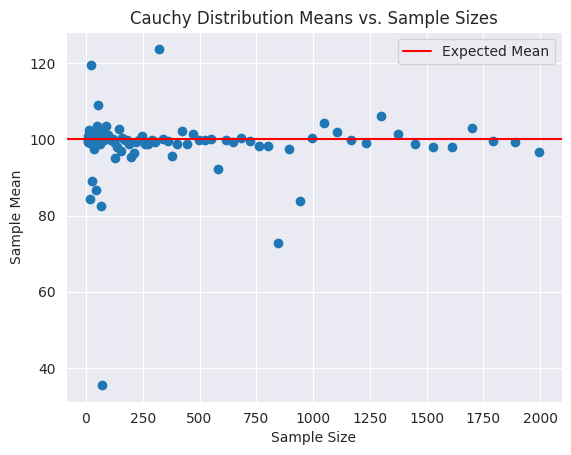

In [ ]:
plt.scatter(mysize,Cauchy_Means)
plt.title("Cauchy Distribution Means vs. Sample Sizes")
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.axhline(100,0,2000,color="red",label = "Expected Mean")
plt.legend()
plt.show()

##Figure 10: Cauchy Distribution sample means vs. sample size.

Law of large numberes applies; larger sample size Cauchy distributions have means that generally are closer to the expected mean of 100.

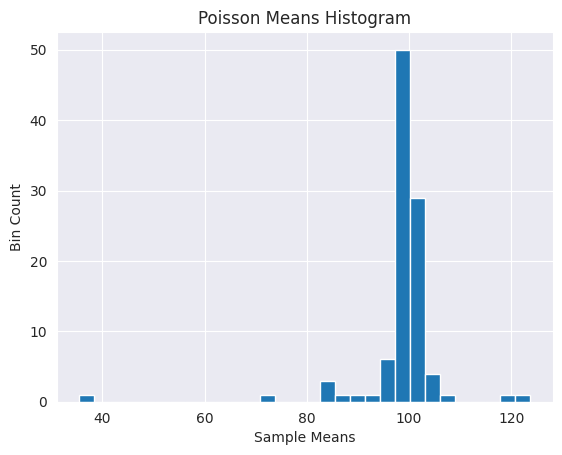

In [ ]:
plt.hist(Cauchy_Means,bins=30)
plt.title("Poisson Means Histogram")
plt.xlabel("Sample Means")
plt.ylabel("Bin Count")
plt.show()

##Fig 11: Cauchy Sample Means histogram. We can see that this histogram looks somewhat gaussian, and the mean would be close to the expected mean of 100. If we had more than 100 samples this probably would look more gaussian, since with the current number of samples there are some heavy outliers at ~40 and ~120.

##PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing

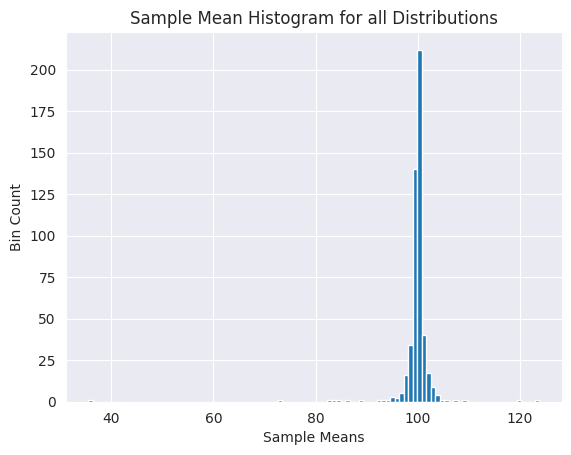

In [ ]:
combined_means = np.asarray([])
combined_means = np.append(combined_means,allmeans)
combined_means = np.append(combined_means,Normal_Means)
combined_means = np.append(combined_means,Pois_Means)
combined_means = np.append(combined_means,Bin_Means)
combined_means = np.append(combined_means,Cauchy_Means)

plt.hist(combined_means,bins=100)
plt.title("Sample Mean Histogram for all Distributions")
plt.xlabel("Sample Means")
plt.ylabel("Bin Count")
plt.show()

##Fig 12: Combined Histogram for the sample means of all 500 distributions. This is (still) gaussian looking, which makes sense because CLT doesn't care about the distribution. If they look gaussian individually (with the same gaussian mean) they will still look pretty gaussian together.

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

# Extra Credit for 461

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram.
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

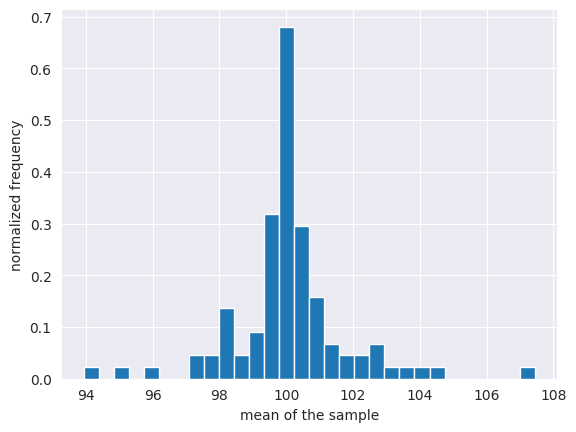

In [ ]:
height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");

In [ ]:
center = (bins[:-1] + bins[1:]) / 2 #finds the centers of the bins

In [ ]:
height

array([0.02268347, 0.        , 0.02268347, 0.        , 0.02268347,
       0.        , 0.        , 0.04536693, 0.04536693, 0.13610079,
       0.04536693, 0.09073386, 0.31756852, 0.68050397, 0.29488506,
       0.15878426, 0.0680504 , 0.04536693, 0.04536693, 0.0680504 ,
       0.02268347, 0.02268347, 0.02268347, 0.02268347, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02268347])

And you can create your own Gaussian function to pass to curve_fit as this for example:

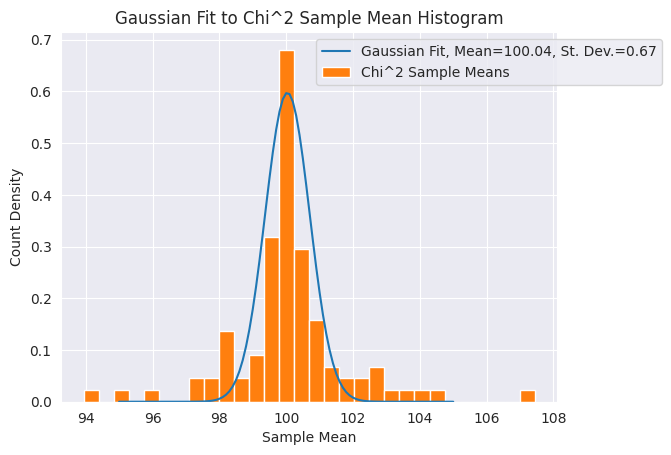

In [ ]:
def gaussian(x, mu, sigma): # this is the gaussian you will fit
  g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
  return g
  '''
  REMEMBER TO WRITE A DOCSTRING THAT EXPLAINS WHAT A FUNCTION DOES EVERY TIME YOU WRITE A FUNCTION
  https://www.python.org/dev/peps/pep-0257/
  '''
#Here's how we can do this... Let's use scipy's curve fit, where the "points" on the curve will be the bin centers and bin heights.

from scipy.optimize import curve_fit
xs = np.linspace(95,105,101)
xs

parameters_chi2, cov_chi2 = curve_fit(gaussian, center, height,p0=[100,2])

plt.plot(xs,gaussian(xs,parameters_chi2[0],parameters_chi2[1]),label="Gaussian Fit, Mean="+str(round(parameters_chi2[0],2))+", St. Dev.="+str(round(parameters_chi2[1],2)))
plt.hist(allmeans,bins=30,density=True,label="Chi^2 Sample Means")
plt.legend(bbox_to_anchor=(0.5,1))
plt.title("Gaussian Fit to Chi^2 Sample Mean Histogram")
plt.ylabel("Count Density")
plt.xlabel("Sample Mean")
plt.show()

##Fig 13: Histogram for Chi^2 sample means with gaussian fit. We can see that the gaussian fit has a mean close to the expected mean, and the fit generally looks pretty good.

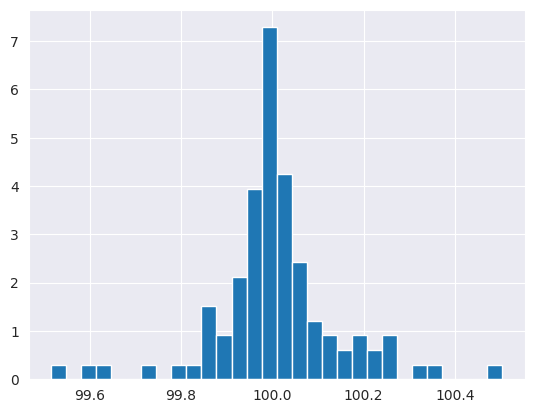

In [ ]:
height_norm, bins_norm, patch_norm  = plt.hist(Normal_Means,bins=30, density=True) #I'm not going to label these plots because I don't actually need them (they're the same as ones above that I haved labeled)-- just using them to get the bins and heights.
center_norm = (bins_norm[:-1] + bins_norm[1:]) / 2

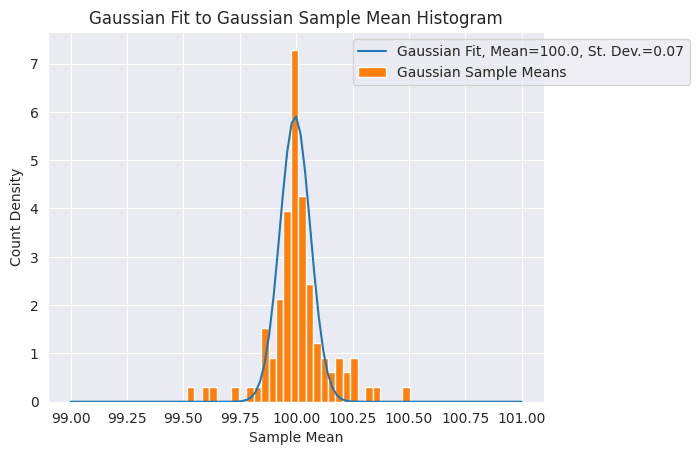

In [ ]:
parameters_norm, cov_norm = curve_fit(gaussian, center_norm, height_norm,p0=[100,2])
xs2 = np.linspace(99,101,101)
plt.plot(xs2,gaussian(xs2,parameters_norm[0],parameters_norm[1]),label="Gaussian Fit, Mean="+str(round(parameters_norm[0],2))+", St. Dev.="+str(round(parameters_norm[1],2)))
plt.hist(Normal_Means,bins=30,density=True,label="Gaussian Sample Means")
plt.legend(bbox_to_anchor=(0.6,1))
plt.title("Gaussian Fit to Gaussian Sample Mean Histogram")
plt.ylabel("Count Density")
plt.xlabel("Sample Mean")
plt.show()

##Fig 14: Histogram for Gaussian sample means with gaussian fit. We can see that the gaussian fit has a mean very close to the expected mean, and the fit again looks good.

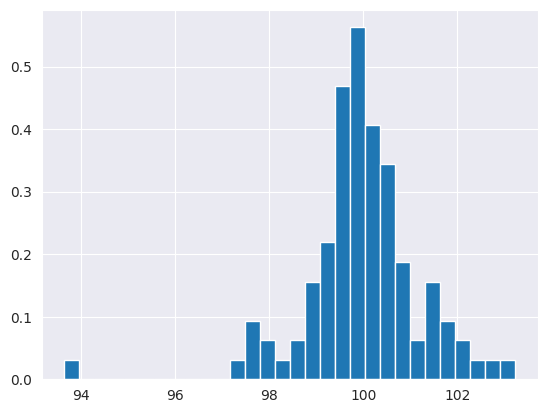

In [ ]:
height_pois, bins_pois, patch_pois  = plt.hist(Pois_Means,bins=30, density=True) #I'm not going to label these plots because I don't actually need them (they're the same as ones above that I haved labeled)-- just using them to get the bins and heights.
center_pois = (bins_pois[:-1] + bins_pois[1:]) / 2

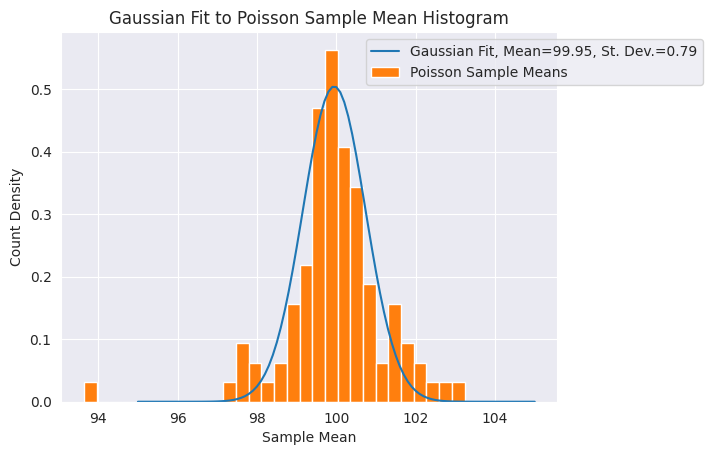

In [ ]:
parameters_pois, cov_pois = curve_fit(gaussian, center_pois, height_pois,p0=[100,2])
plt.plot(xs,gaussian(xs,parameters_pois[0],parameters_pois[1]),label="Gaussian Fit, Mean="+str(round(parameters_pois[0],2))+", St. Dev.="+str(round(parameters_pois[1],2)))
plt.hist(Pois_Means,bins=30,density=True,label="Poisson Sample Means")
plt.legend(bbox_to_anchor=(0.6,1))
plt.title("Gaussian Fit to Poisson Sample Mean Histogram")
plt.ylabel("Count Density")
plt.xlabel("Sample Mean")
plt.show()

##Fig 15: Histogram for Poisson sample means with gaussian fit. Both mean and fit once again look good.

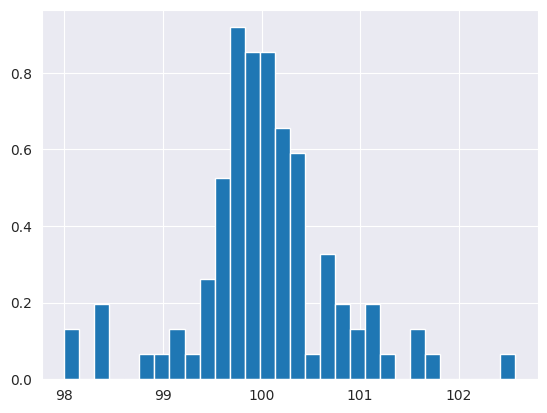

In [ ]:
height_bin, bins_bin, patch_bin  = plt.hist(Bin_Means,bins=30, density=True) #I'm not going to label these plots because I don't actually need them (they're the same as ones above that I haved labeled)-- just using them to get the bins and heights.
center_bin = (bins_bin[:-1] + bins_bin[1:]) / 2

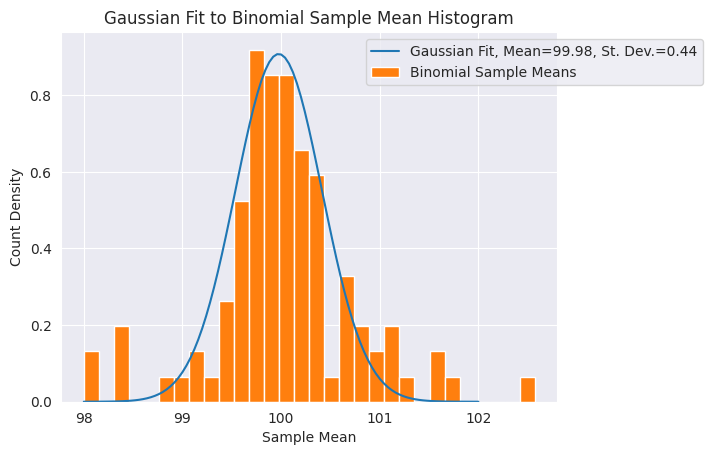

In [ ]:
parameters_bin, cov_bin = curve_fit(gaussian, center_bin, height_bin,p0=[100,2])
xs3 = np.linspace(98,102,101)
plt.plot(xs3,gaussian(xs3,parameters_bin[0],parameters_bin[1]),label="Gaussian Fit, Mean="+str(round(parameters_bin[0],2))+", St. Dev.="+str(round(parameters_bin[1],2)))
plt.hist(Bin_Means,bins=30,density=True,label="Binomial Sample Means")
plt.legend(bbox_to_anchor=(0.6,1))
plt.title("Gaussian Fit to Binomial Sample Mean Histogram")
plt.ylabel("Count Density")
plt.xlabel("Sample Mean")
plt.show()

##Fig 15: Histogram for Binomial sample means with gaussian fit. Mean is close to expected, and fit is generally good, although there are some outliers.

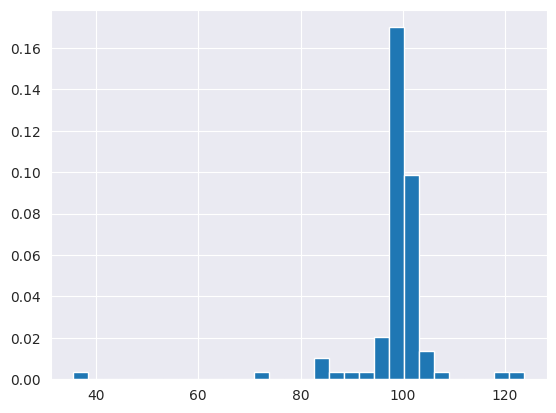

In [ ]:
height_cauchy, bins_cauchy, patch_cauchy  = plt.hist(Cauchy_Means,bins=30, density=True) #I'm not going to label these plots because I don't actually need them (they're the same as ones above that I haved labeled)-- just using them to get the bins and heights.
center_cauchy = (bins_bin[:-1] + bins_bin[1:]) / 2

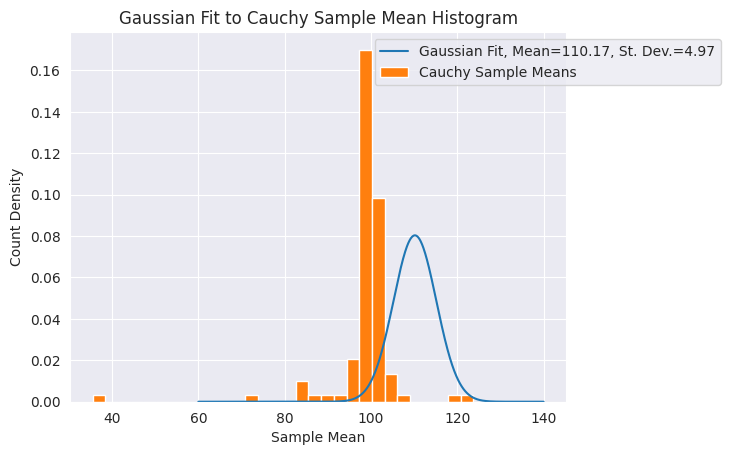

In [ ]:
parameters_cauchy, cov_cauchy = curve_fit(gaussian, center_cauchy, height_cauchy,p0=[100,10])
xs4 = np.linspace(60,140,1001)
plt.plot(xs4,gaussian(xs4,parameters_cauchy[0],parameters_cauchy[1]),label="Gaussian Fit, Mean="+str(round(parameters_cauchy[0],2))+", St. Dev.="+str(round(parameters_cauchy[1],2)))
plt.hist(Cauchy_Means,bins=30,density=True,label="Cauchy Sample Means")
plt.legend(bbox_to_anchor=(0.6,1))
plt.title("Gaussian Fit to Cauchy Sample Mean Histogram")
plt.ylabel("Count Density")
plt.xlabel("Sample Mean")
plt.show()

#the outliers on the Cauchy are not helping with the gaussian fit here.

##Fig 16: Histogram for Cauchy sample means with gaussian fit. The outliers are fairly large for the Cauchy means, so there's a significant difference between the mean and expected mean, and thus the fit suffers as a result.

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

**You can do it by eye** (partial credit 0.5/1).

It would be better to do it programmatically. To fit the data you can use `scipy.minimize` or `scipy.optimize`